In [1]:
 !pip install transformers

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/5-class-bangla-news-comments/5 class Bangla News comments dataset.xlsx


In [5]:
df=pd.read_excel('/kaggle/input/5-class-bangla-news-comments/5 class Bangla News comments dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13802 entries, 0 to 13801
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13802 non-null  int64 
 1   Index       13802 non-null  int64 
 2   Text        13800 non-null  object
 3   Sentiment   13802 non-null  object
 4   Label       13802 non-null  int64 
 5   Token       13802 non-null  object
 6   Token_ID    13802 non-null  object
dtypes: int64(3), object(4)
memory usage: 754.9+ KB


In [6]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 42.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.0-py3-none-any.whl size=25313832 sha256=f66c9668cf28503a8ec4f55bb1cec59f84f6a9a853065602594b3f776337305d
  Stored in directory: /root/.cache/pip/wheels/cb/c2/1a/db7e1066fb4a94becc327ec359a493a8899089609d5569

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [8]:
import ktrain
from ktrain import text

In [27]:
train=df[:int(.8*len(df))]
test=df[int(.8*len(df)):int(.9*len(df))]
validation=df[int(.9*len(df)):]
x_train=train['Text'].tolist()
y_train=train['Label'].tolist()
x_validation=validation['Text'].tolist()
y_validation=validation['Label'].tolist()
x_test=test['Text'].tolist()
y_test=test['Label'].tolist()

In [10]:
x_train= np.array(x_train)
x_validation= np.array(x_validation)
x_test= np.array(x_test)


In [21]:
categories = ['0','1','2','3','4']

In [12]:
model_name = 'sagorsarker/bangla-bert-base'
trans = text.Transformer(model_name,maxlen=250,class_names=categories)

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/930M [00:00<?, ?B/s]

In [13]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 19
	95percentile : 55
	99percentile : 80


Downloading:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 19
	95percentile : 55
	99percentile : 81


In [14]:
model = trans.get_classifier()

In [15]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [17]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(5)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
920/920 [==============================] - 674s 705ms/step - loss: 1.6895 - accuracy: 0.2573
Epoch 2/10
920/920 [==============================] - 657s 715ms/step - loss: 1.5602 - accuracy: 0.2975
Epoch 3/10
920/920 [==============================] - 656s 713ms/step - loss: 1.4868 - accuracy: 0.3495
Epoch 4/10
920/920 [==============================] - 657s 714ms/step - loss: 1.4753 - accuracy: 0.3571
Epoch 5/10
920/920 [==============================] - 654s 711ms/step - loss: 1.6151 - accuracy: 0.2585
Epoch 6/10
920/920 [==============================] - 654s 711ms/step - loss: 1.8589 - accuracy: 0.2448
Epoch 7/10
920/920 [==============================] - 652s 708ms/step - loss: 4.3470 - accuracy: 0.2131
Epoch 8/10
920/920 [==============================] - 13s 14ms/step - loss: 8.6642 - accuracy: 0.1969


done.
Visually inspect loss plot and select learning rate associated with falling los

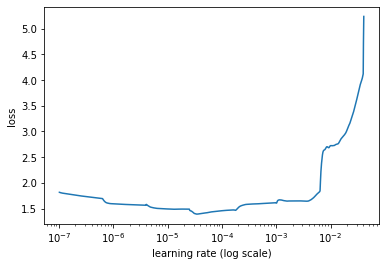

In [18]:
learner.lr_find(show_plot = True,max_epochs=10)

In [19]:
learner.fit_onecycle(2e-5,20,class_weight=weight) 



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
921/921 [==============================] - 699s 740ms/step - loss: 1.6090 - accuracy: 0.2527 - val_loss: 1.5458 - val_accuracy: 0.2802
Epoch 2/20
921/921 [==============================] - 675s 733ms/step - loss: 1.5106 - accuracy: 0.3342 - val_loss: 1.5575 - val_accuracy: 0.2918
Epoch 3/20
921/921 [==============================] - 675s 733ms/step - loss: 1.4266 - accuracy: 0.3879 - val_loss: 1.5724 - val_accuracy: 0.2983
Epoch 4/20
921/921 [==============================] - 675s 733ms/step - loss: 1.3046 - accuracy: 0.4521 - val_loss: 1.7532 - val_accuracy: 0.2542
Epoch 5/20
921/921 [==============================] - 676s 734ms/step - loss: 1.0927 - accuracy: 0.5540 - val_loss: 1.8667 - val_accuracy: 0.2817
Epoch 6/20
921/921 [==============================] - 676s 734ms/step - loss: 0.7977 - accuracy: 0.6813 - val_loss: 2.0969 - val_accuracy: 0.3121
Epoch 7/20
921/921 [==============================] - 675s 73

In [29]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

           0       0.30      0.28      0.29       309
           1       0.28      0.22      0.24       310
           2       0.12      0.12      0.12       153
           3       0.39      0.43      0.41       390
           4       0.31      0.37      0.34       219

    accuracy                           0.31      1381
   macro avg       0.28      0.28      0.28      1381
weighted avg       0.30      0.31      0.30      1381



array([[ 88,  53,  32,  94,  42],
       [ 69,  67,  40,  78,  56],
       [ 28,  31,  19,  39,  36],
       [ 81,  55,  41, 167,  46],
       [ 24,  34,  30,  50,  81]])

In [30]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [31]:
y_pred = predictor.predict(x_test)
#print(y_pred)

In [33]:
from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_mbert_uncased)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('5 sagorsarker/bangla-bert-base Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])
sns.set(color_codes=True)
sns.set(font_scale=.8)
plt.savefig('5 sagorsarker/bangla-bert-base Confusion Matrix.png', bbox_inches = "tight")
plt.show()

NameError: name 'y_pred_mbert_uncased' is not defined